In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import sklearn.feature_extraction.text as TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import difflib

In [8]:
# Loading data set
df = pd.read_csv("C:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python312\\college project 1\\data.csv")
df

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [9]:
# First 5 rows
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [10]:
# Numbers of rows and columns
df.shape

(6810, 12)

In [11]:
#  Selecting relevant features for recommendations
selected_features = ['categories', 'num_pages' ,'title', 'published_year', 'average_rating']
df_selected =df[selected_features]
df_selected

,categories,num_pages,title,published_year,average_rating
0,Fiction,247.0,Gilead,2004.0,3.85
1,Detective and mystery stories,241.0,Spider's Web,2000.0,3.83
2,American fiction,479.0,The One Tree,1982.0,3.97
3,Fiction,512.0,Rage of angels,1993.0,3.93
4,Christian life,170.0,The Four Loves,2002.0,4.15
...,...,...,...,...,...
6805,Philosophy,531.0,I Am that,1999.0,4.51
6806,Mysticism,74.0,Secrets Of The Heart,1993.0,4.08
6807,Book burning,186.0,Fahrenheit 451,2004.0,3.98
6808,History,210.0,The Berlin Phenomenology,1981.0,0.00


In [12]:
#  Replacing null values with an empty string
df_selected = df_selected.fillna('')
df_selected

,categories,num_pages,title,published_year,average_rating
0,Fiction,247.0,Gilead,2004.0,3.85
1,Detective and mystery stories,241.0,Spider's Web,2000.0,3.83
2,American fiction,479.0,The One Tree,1982.0,3.97
3,Fiction,512.0,Rage of angels,1993.0,3.93
4,Christian life,170.0,The Four Loves,2002.0,4.15
...,...,...,...,...,...
6805,Philosophy,531.0,I Am that,1999.0,4.51
6806,Mysticism,74.0,Secrets Of The Heart,1993.0,4.08
6807,Book burning,186.0,Fahrenheit 451,2004.0,3.98
6808,History,210.0,The Berlin Phenomenology,1981.0,0.0


In [13]:
#  Combining the selected features into a new column for text data processing
df_selected['combined_features'] = df_selected['categories'] + ' ' + df_selected['title']
df_selected['combined_features']

0                                     Fiction Gilead
1         Detective and mystery stories Spider's Web
2                      American fiction The One Tree
3                             Fiction Rage of angels
4                      Christian life The Four Loves
                            ...                     
6805                            Philosophy I Am that
6806                  Mysticism Secrets Of The Heart
6807                     Book burning Fahrenheit 451
6808                History The Berlin Phenomenology
6809    Literary Criticism 'I'm Telling You Stories'
Name: combined_features, Length: 6810, dtype: object

In [14]:
# Converting text data to feature vectors using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(df_selected['combined_features'])
print("\nFeature vector:")
print(feature_vector.shape)


Feature vector:
(6810, 6647)


In [16]:
# Calculate cosine similarity between feature vectors
similarity = cosine_similarity(feature_vector)

# Get the book name from the user
def get_book_recommendations():
    book_category = input("Enter a book genre / category: ")

    # Create a list of all book titles
    book_titles = df['title'].tolist()

    # Find the closest match to the input book name
    close_match = difflib.get_close_matches(book_category, book_titles, n=1)

    if close_match:
        # Find the index of the book in the dataset
        index_of_book = df[df['title'] == close_match[0]].index[0]

        # Get a list of similarity scores for that book
        similarity_scores = list(enumerate(similarity[index_of_book]))

        # Sort the book based on similarity scores
        sorted_similar_book = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

        # Create a list of tuples (book_title, book_rating) for the top similar books
        recommended_books = []
        for book in sorted_similar_book[1:7]:  # Skip the first book because it will be the same book
            book_index = book[0]  # Get the index of the similar book
            book_title = df['title'].iloc[book_index]  # Get the title of the book
            book_rating = df['average_rating'].iloc[book_index]  # Get the rating of the book
            recommended_books.append((book_title, book_rating))

        # Sort the recommended books by rating in descending order
        recommended_books.sort(key=lambda x: x[1], reverse=True)

        # Print the sorted books
        print(f"Books similar to '{book_category}':")
        for title, rating in recommended_books:
            print(f"Title: {title}, Rating: {rating}")

# Run the recommendation system
get_book_recommendations()

Enter a book genre / category:  stories


Books similar to 'stories':
Title: The complete stories, Rating: 4.4
Title: The Complete Stories, Rating: 4.35
Title: Collected Stories, Rating: 4.3
Title: Selected Stories, Rating: 4.27
Title: The Complete Stories, Rating: 4.25
Title: Collected Stories, Rating: 4.19


C:\Users\admin\AppData\Local\Temp\ipykernel_8248\671050546.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_books['average_rating'], y=top_10_books['title'], palette="viridis")


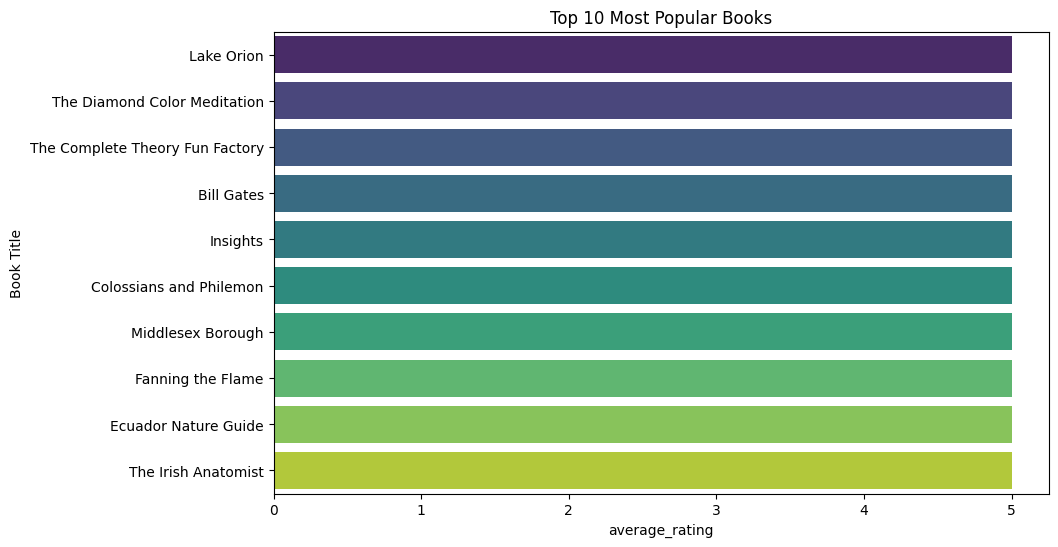

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rating' and 'title' are columns in the dataset
top_10_books = df[['title', 'average_rating']].sort_values(by='average_rating', ascending=False).head(10)

# Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_books['average_rating'], y=top_10_books['title'], palette="viridis")
plt.title('Top 10 Most Popular Books')
plt.xlabel('average_rating')
plt.ylabel('Book Title')
plt.show()

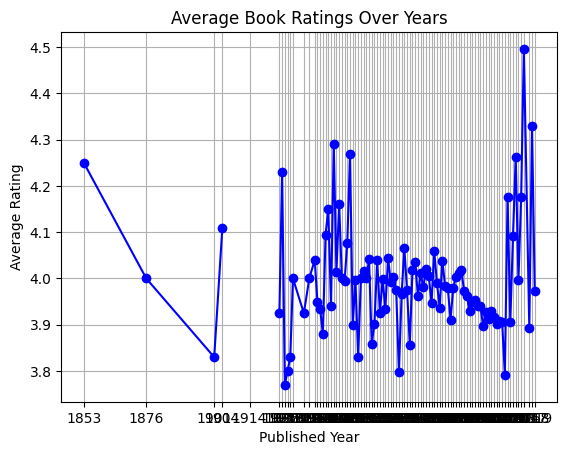

In [18]:
# Group by published year and calculate the average rating
average_ratings = df.groupby('published_year')['average_rating'].mean()

# Create a line chart
plt.plot(average_ratings.index, average_ratings.values, marker='o', color='blue')

# Add title and labels
plt.title('Average Book Ratings Over Years')
plt.xlabel('Published Year')
plt.ylabel('Average Rating')

# Show the plot
plt.grid()
plt.xticks(average_ratings.index)  # Show all years on the x-axis
plt.show()

C:\Windows\Fonts\ntailub.ttf
C:\Windows\Fonts\LCALLIG.TTF
C:\Windows\Fonts\SCHLBKI.TTF
C:\Windows\Fonts\TCM_____.TTF
C:\Windows\Fonts\MATURASC.TTF
C:\Windows\Fonts\YuGothR.ttc
C:\Windows\Fonts\BRLNSR.TTF
C:\Windows\Fonts\FRADMIT.TTF
C:\Windows\Fonts\corbel.ttf
C:\Windows\Fonts\BOD_BLAI.TTF
C:\Windows\Fonts\ITCBLKAD.TTF
C:\Windows\Fonts\CURLZ___.TTF
C:\Windows\Fonts\ERASBD.TTF
C:\Windows\Fonts\PERBI___.TTF
C:\Windows\Fonts\ariali.ttf
C:\Windows\Fonts\gadugi.ttf
C:\Windows\Fonts\calibrii.ttf
C:\Windows\Fonts\calibrib.ttf
C:\Windows\Fonts\impact.ttf
C:\Windows\Fonts\PER_____.TTF
C:\Windows\Fonts\ARIALNBI.TTF
C:\Windows\Fonts\BRLNSB.TTF
C:\Windows\Fonts\cour.ttf
C:\Windows\Fonts\Candara.ttf
C:\Windows\Fonts\LFAXI.TTF
C:\Windows\Fonts\ARLRDBD.TTF
C:\Windows\Fonts\FELIXTI.TTF
C:\Windows\Fonts\corbell.ttf
C:\Windows\Fonts\cambria.ttc
C:\Windows\Fonts\ERASLGHT.TTF
C:\Windows\Fonts\segoeui.ttf
C:\Windows\Fonts\LHANDW.TTF
C:\Windows\Fonts\Nirmala.ttf
C:\Windows\Fonts\ROCCB___.TTF
C:\Windows\Font

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27973 (\N{CJK UNIFIED IDEOGRAPH-6D45}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33609 (\N{CJK UNIFIED IDEOGRAPH-8349}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32005 (\N{CJK UNIFIED IDEOGRAPH-7D05}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22243 (\N{CJK UNIFIED IDEOGRAPH-56E3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Local\Programs\Python

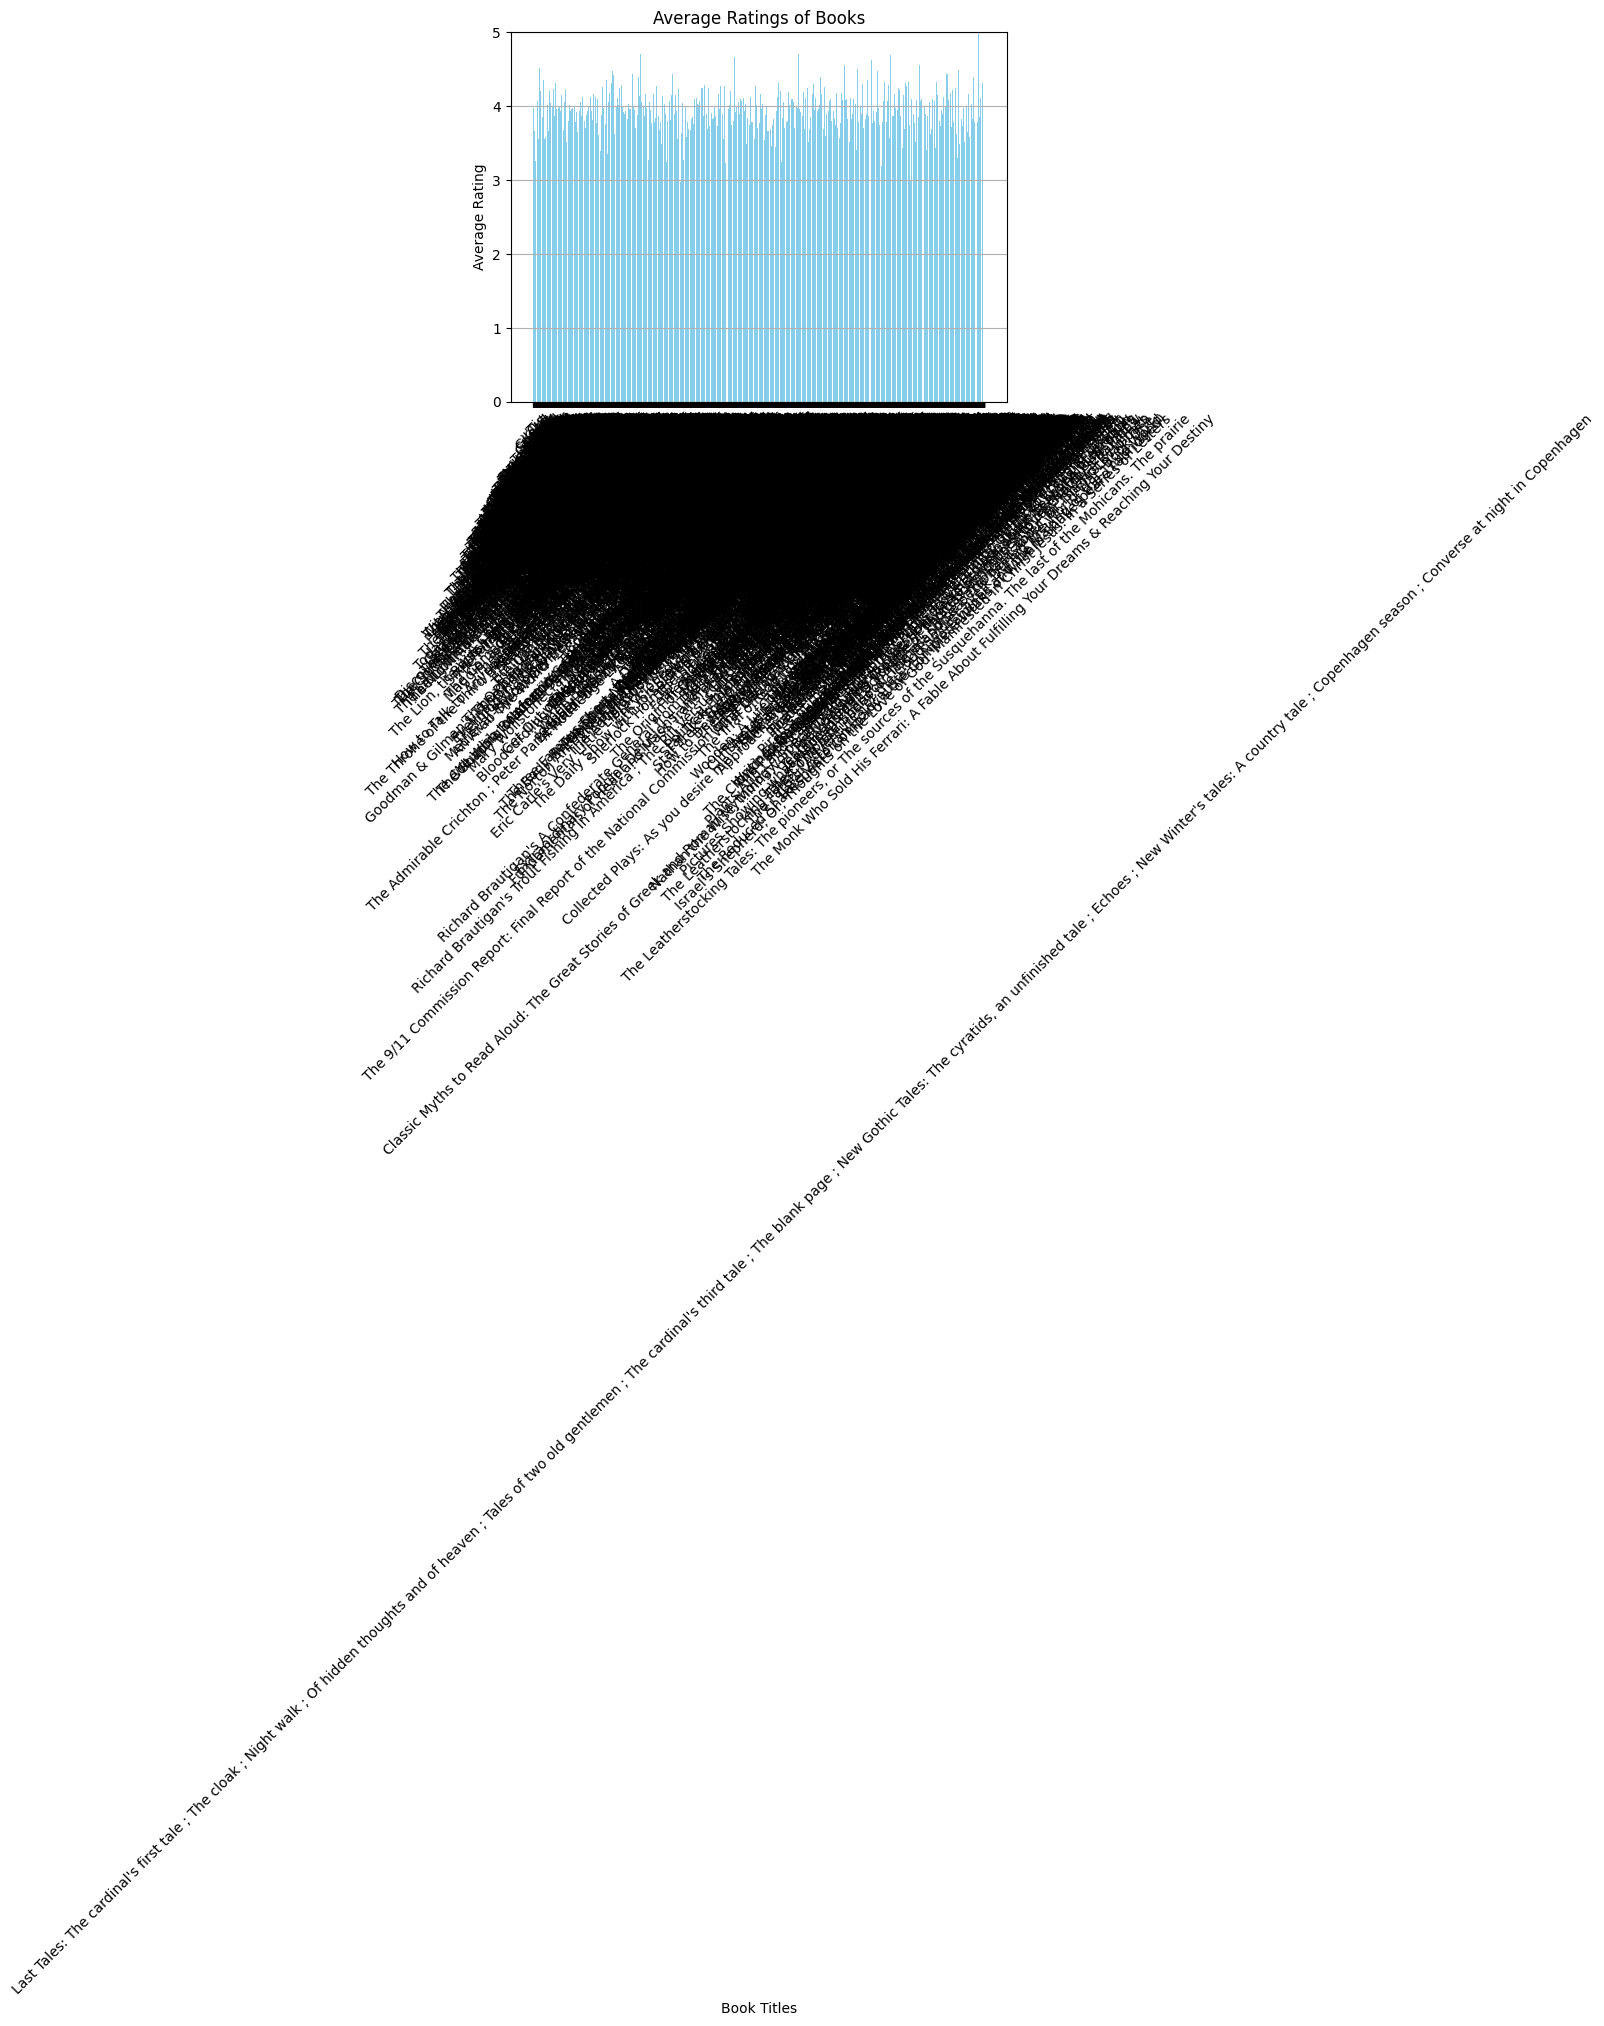

In [19]:
import matplotlib.font_manager as fm
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(font)

# Create a bar chart for average ratings
plt.bar(df['title'], df['average_rating'], color='skyblue')

# Add title and labels
plt.title('Average Ratings of Books')
plt.xlabel('Book Titles')
plt.ylabel('Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(axis='y')  # Add grid lines for better readability
plt.ylim(0, 5)  # Set y-axis limit from 0 to 5 (assuming ratings are out of 5)
plt.show()

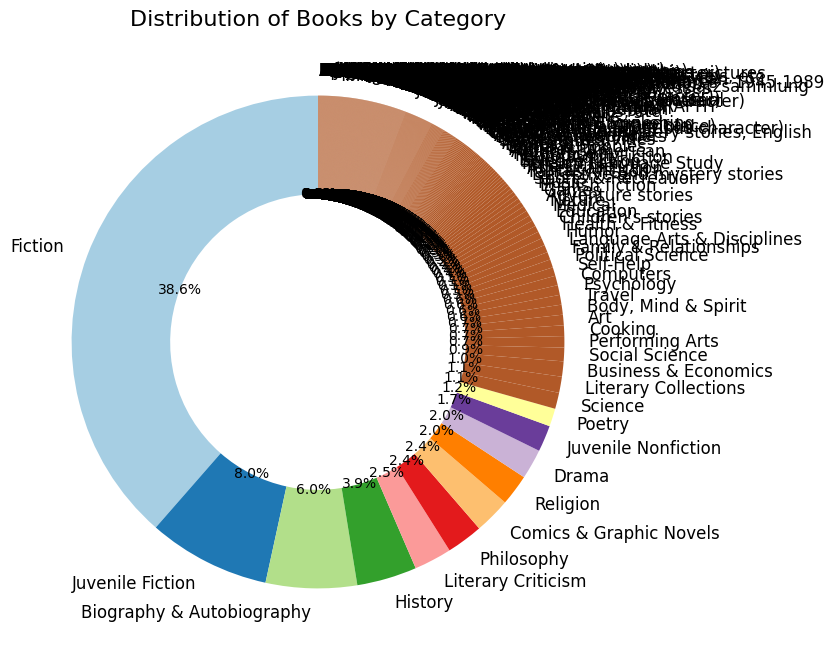

In [20]:
# Group books by category and count their occurrences
category_counts = df['categories'].value_counts()

# Plot a donut chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired(range(len(category_counts)))

# Create a pie chart
wedges, texts, autotexts = plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4),  # Adjust width for a donut chart
)

# Add a title
plt.title('Distribution of Books by Category', fontsize=16)

# Customize text appearance
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(10)

# Show the plot
plt.show()